### 판다스 실습

- pip install matplotlib
- pit install seaborn

판다스 - 데이터 분석 도구
  - 구성요소 3가지
    - Series : 1개의 컬럼값만 가진 1차원 데이터셋
    - DataFrame : Column * Row 2차원 데이터셋 (테이블구조)
    - Index : 고유한 키값


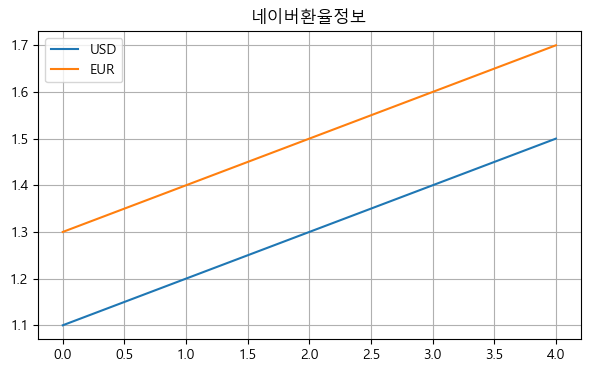

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성 (실제 사용 시 df2에 해당하는 실제 데이터 사용)
data = {
    "USD": [1.1, 1.2, 1.3, 1.4, 1.5],
    "EUR": [1.3, 1.4, 1.5, 1.6, 1.7]
}
df2 = pd.DataFrame(data)

# 시각화
# 차트의  크기를 가로 7인치 세로 4인치로 설정합니다.
# @param3 - 차트에 그리드를 표시합니다.
df2.plot(figsize=(7, 4), title="네이버환율정보", grid=True)

# 차트를 보여주기 위한 명령
# 일부 환경에서는 없어도 시각화를 처리해주지만 일관된 결과를 위해서 
# 명시적으로 호출하는 것이 좋습니다.
plt.show()

In [4]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
path = "./malgun.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc('font', family="Malgun Gothic")

#### Series 구조
 - pandas가 제공하는 객체
 - 객체생성 : 생성자 호출 -> 전역변수 초기화 - 파라미터에 아무것도 없는 것 : 디폴트생성자
 - pd는 Series의 소유주다.
 - Series(list가 올수있다)

In [10]:
type([1,2,3])

list

In [12]:
type({"mem_id":"kiwi"})
se =pd.Series({"mem_id":"kiwi"})
print(se)

mem_id    kiwi
dtype: object


In [9]:
import pandas as pd
se = pd.Series([1,2,3,4,5])

#len(se)
print(se)

0    1
1    2
2    3
3    4
4    5
dtype: int64


특정값 추출 - values, index

In [14]:
print(se[0])
print(se[3])

1
4


In [20]:
type((1,2,3,))

tuple

In [21]:
#파라미터에 리스트도 딕셔너리도 튜플도 된다.
se=pd.Series((1,2,3,))

In [22]:
se[len(se)-1]

np.int64(3)

In [18]:
se[2]

np.int64(3)

In [23]:
se[len(se)-1] == se[2]

np.True_

In [29]:
print(type(se))

<class 'pandas.core.series.Series'>


In [28]:
print(se.index)

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=0, stop=3, step=1)


In [26]:
se.values #Series 안에 Numpy가 포함되어 있다.

array([1, 2, 3, 4, 5])

In [93]:
se = pd.Series(['a','b','c','d','e'])
se

0    a
1    b
2    c
3    d
4    e
dtype: object

In [110]:
print(se['a'])

KeyError: 'a'

### index 변경하기

In [16]:
#Series 생성 -  index 명시
#series[파라미터1,파라미터2, 파라미터3....] 

import pandas as pd
se3 = pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
se3.name = "numOrder"
se3.index.name = "numName"
se3

numName
a    1
b    2
c    3
d    4
e    5
Name: numOrder, dtype: int64

In [17]:
se3.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object', name='numName')

In [19]:
se3>2

numName
a    False
b    False
c     True
d     True
e     True
Name: numOrder, dtype: bool

In [22]:
se3[se3>2]

numName
c    3
d    4
e    5
Name: numOrder, dtype: int64

In [23]:
se3[se3<3]

numName
a    1
b    2
Name: numOrder, dtype: int64

In [24]:
se3[-(se3>2)]

numName
a    1
b    2
Name: numOrder, dtype: int64

DataFrame(데이터 프레임)
  - Pandas 에서 행과 열을 가지는 자료구조
  - 데이터 프레임은 2차원 이므로 행방향 인덱스와 열방향 인덱스가 존재
  - 데이터 프레임은 열,인덱스, 값으로 구성됨

In [33]:
data = {"name":['Lee','Park','Kim','Choi']
        ,"score":[85,90,100,70]
        ,"grade":['B','A','A','C']
}
df = pd.DataFrame(data)
df

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A
3,Choi,70,C


In [34]:
df = pd.DataFrame(data, columns=['name','grade','score'])
df

,name,grade,score
0,Lee,B,85
1,Park,A,90
2,Kim,A,100
3,Choi,C,70


In [35]:
df.values

array([['Lee', 'B', 85],
       ['Park', 'A', 90],
       ['Kim', 'A', 100],
       ['Choi', 'C', 70]], dtype=object)

In [36]:
df.columns

Index(['name', 'grade', 'score'], dtype='object')

In [37]:
df.index.name='No'
df.columns.name='info'
df

info,name,grade,score
No,,,
0,Lee,B,85
1,Park,A,90
2,Kim,A,100
3,Choi,C,70


In [38]:
#특정값 추출하기

df['name'].values

array(['Lee', 'Park', 'Kim', 'Choi'], dtype=object)

In [39]:
#로우와 결합 지정으로 특정값 추출
df.loc[1,'name']

'Park'

In [47]:
df=df.set_index('name')
df.loc["Choi","grade"]

'C'

In [48]:
#DataFrame을 딕셔너리로 변경하기.
df.to_dict()

{'grade': {'Lee': 'B', 'Park': 'A', 'Kim': 'A', 'Choi': 'C'},
 'score': {'Lee': 85, 'Park': 90, 'Kim': 100, 'Choi': 70}}

In [54]:
import numpy as np
array =np.array([['Lee',100,'A'],['Park',95,'A'],['Kim',85,'B']])
df=pd.DataFrame(data,columns=['name','score','grade'])
df

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A
3,Choi,70,C


####데이터 셀렉션 및 필터링
  1) [ ] - 칼럼기반 필터링 또는 불린 인덱싱 필터링 제공  
    - (ex : df.칼럼명.df["칼럼명"],df[1:3],df[:2]
    
  2) loc[인덱스명,칼럼명] - 명칭(label)기반 인덱싱  
    - index명,column명 기준으로 데이터가 조회됩니다.  
    - (ex : 하나의 항만 검색 - df.loc[0] ) 

In [55]:
df.name

0     Lee
1    Park
2     Kim
3    Choi
Name: name, dtype: object

In [56]:
df['name']

0     Lee
1    Park
2     Kim
3    Choi
Name: name, dtype: object

In [57]:
df[1:3] # [시작되는 index : index 미포함 ] # 1,2

,name,score,grade
1,Park,90,A
2,Kim,100,A


In [59]:
df[:3]

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A


In [60]:
df[:-1]

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A


  2) loc[인덱스명,칼럼명] - 명칭(label)기반 인덱싱  
    - index명,column명 기준으로 데이터가 조회됩니다.  
    - (ex : 하나의 항만 검색 - df.loc[0] ) 

In [62]:
df.loc[0]

name     Lee
score     85
grade      B
Name: 0, dtype: object

In [67]:
#여러행을 검색할때
df.loc[[0,1]]

,name,score,grade
0,Lee,85,B
1,Park,90,A


In [70]:
#여러 행과 열을 검색할때
df.loc[0:2,['score','grade','name']]

,score,grade,name
0,85,B,Lee
1,90,A,Park
2,100,A,Kim


In [75]:
df[['name','grade']]

,name,grade
0,Lee,B
1,Park,A
2,Kim,A
3,Choi,C


In [76]:
df.loc[[0,2]] #0과2 

,name,score,grade
0,Lee,85,B
2,Kim,100,A


In [77]:
df.loc[0:2] #0~2 까지

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A


3. iloc[인덱스,칼럼인덱스] - 위치기반 인덱싱 
 - 0을 출발점으로 하는 가로축, 세로축 좌표기반의 행과 열의 위치를 기반으로 데이터를 지정  
 - 행,열 위치값으로 정수를 사용할 수 있음. 오직 인덱스 기준으로 데이터를 가져옴.  
 

In [79]:
df.iloc[0]

name     Lee
score     85
grade      B
Name: 0, dtype: object

In [99]:
df.iloc[1,0]

'Park'

In [100]:
df.iloc[0:3]

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A


In [102]:
df.iloc[0:1,0:1]

,name
0,Lee


In [104]:
df.iloc[1:2,0:1]

,name
1,Park


In [101]:
df.iloc[0:3,0:2]

,name,score
0,Lee,85
1,Park,90
2,Kim,100


4.불린(Boolean) 인덱스

In [105]:
df.loc[df['score']>90]

,name,score,grade
2,Kim,100,A


In [109]:
df

,name,score,grade
0,Lee,85,B
1,Park,90,A
2,Kim,100,A
3,Choi,70,C


In [108]:
df.loc[df['grade']=='A']

,name,score,grade
1,Park,90,A
2,Kim,100,A
